In [1]:
Ejemplo Filtro pasa bajos RC

SyntaxError: invalid syntax (1255377515.py, line 1)

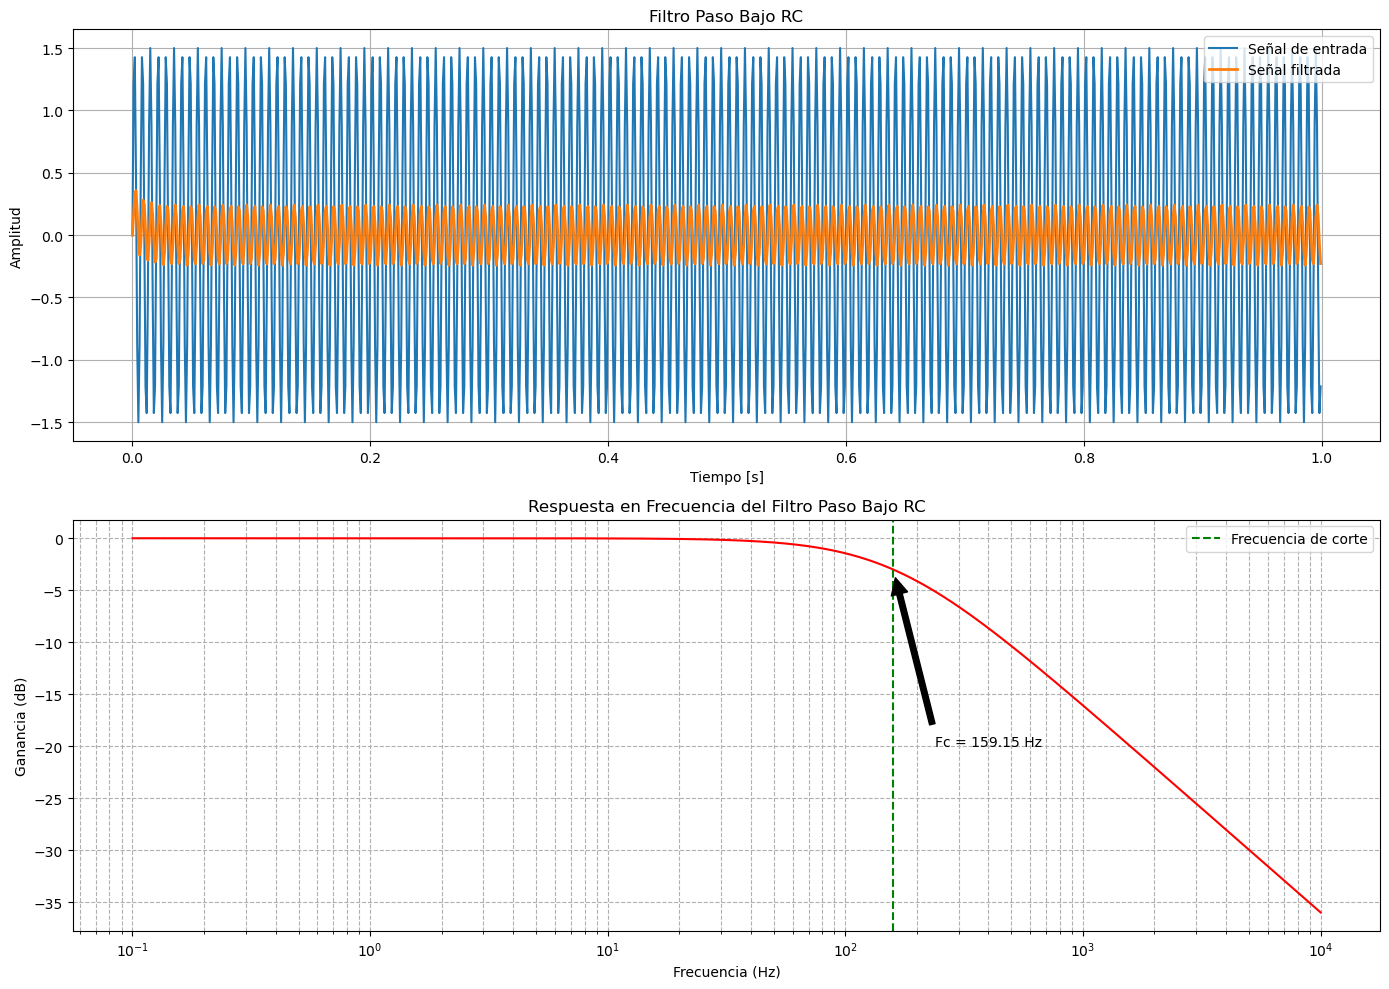

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del filtro
R = 1000  # Resistencia en ohmios
C = 1e-6  # Capacitancia en faradios
fc = 1 / (2 * np.pi * R * C)  # Frecuencia de corte

# Parámetros de la señal de entrada
fs = 1000  # Frecuencia de muestreo en Hz
t = np.arange(0, 1, 1/fs)  # Vector de tiempo (1 segundo)
f1 =  150 # Frecuencia de la señal de baja frecuencia
f2 = 150  # Frecuencia de la señal de alta frecuencia

# Señal de entrada: combinación de dos señales sinusoidales
x = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Filtro paso bajo RC
alpha = 1 / (1 + (2 * np.pi * R * C * fs))
y = np.zeros_like(x)
for i in range(1, len(x)):
    y[i] = alpha * x[i] + (1 - alpha) * y[i-1]

# Graficar las señales
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(t, x, label='Señal de entrada')
plt.plot(t, y, label='Señal filtrada', linewidth=2)
plt.title('Filtro Paso Bajo RC')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# Respuesta en frecuencia del filtro
f = np.logspace(-1, 4, 1000)  # Frecuencias de 0.1 Hz a 10 kHz
H = 1 / np.sqrt(1 + (2 * np.pi * f * R * C)**2)
H_dB = 20 * np.log10(H)

# Gráfica de la respuesta en frecuencia
plt.subplot(2, 1, 2)
plt.semilogx(f, H_dB, 'r')
plt.title('Respuesta en Frecuencia del Filtro Paso Bajo RC')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia (dB)')
plt.grid(True, which="both", ls="--")

# Frecuencia de corte
plt.axvline(fc, color='green', linestyle='--', label='Frecuencia de corte')
plt.annotate(f'Fc = {fc:.2f} Hz', xy=(fc, -3), xytext=(fc*1.5, -20),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.legend()
plt.tight_layout()
plt.show()

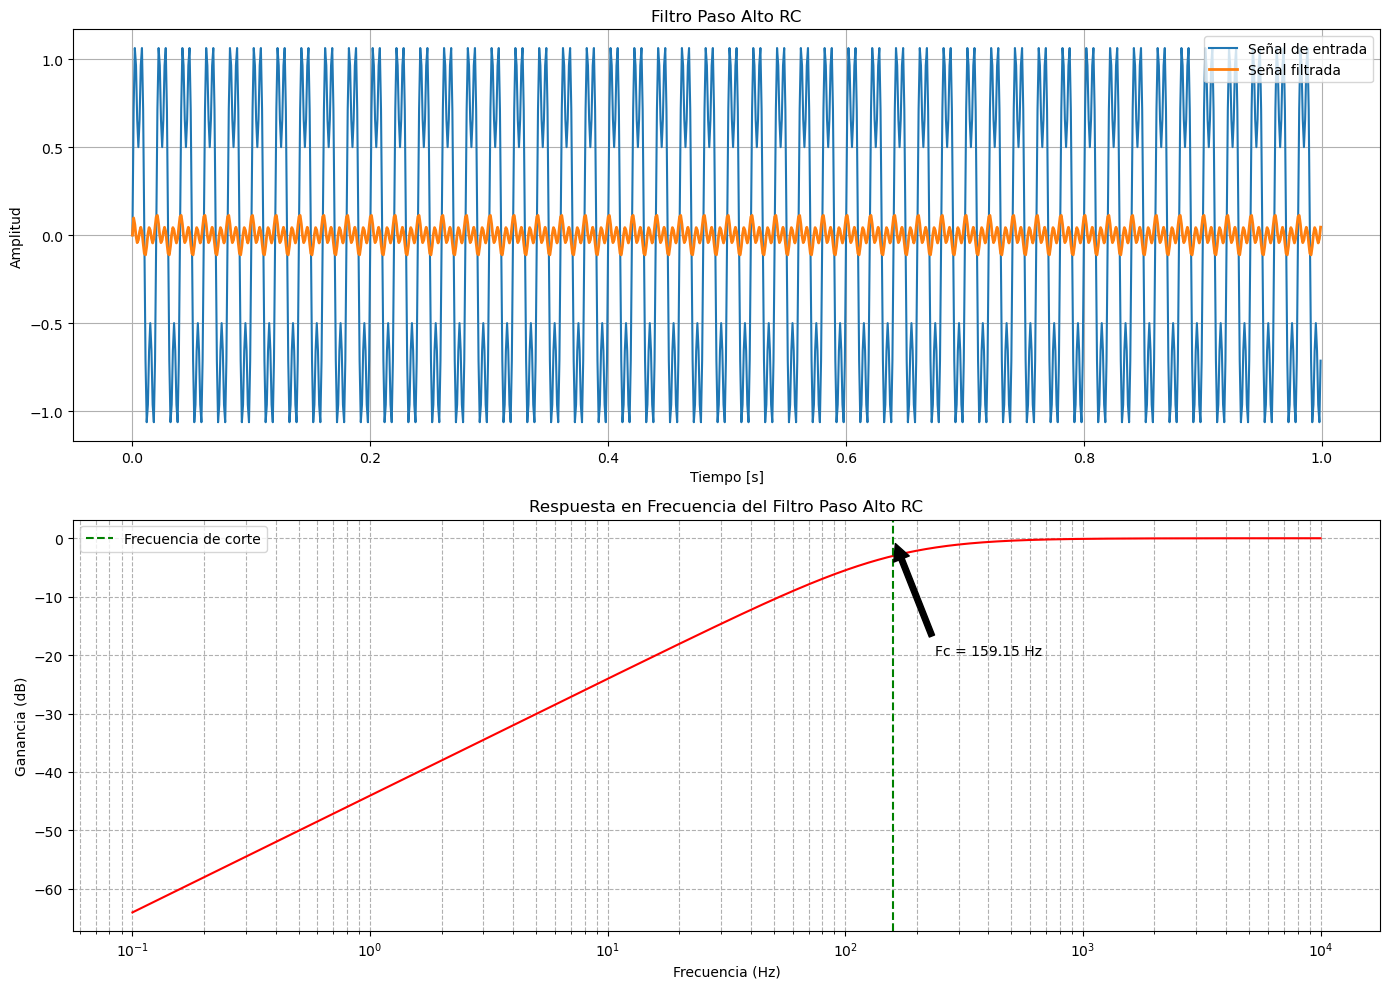

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del filtro
R = 1000  # Resistencia en ohmios
C = 1e-6  # Capacitancia en faradios
fc = 1 / (2 * np.pi * R * C)  # Frecuencia de corte

# Parámetros de la señal de entrada
fs = 1000  # Frecuencia de muestreo en Hz
t = np.arange(0, 1, 1/fs)  # Vector de tiempo (1 segundo)
f1 = 50  # Frecuencia de la señal de baja frecuencia
f2 = 150  # Frecuencia de la señal de alta frecuencia

# Señal de entrada: combinación de dos señales sinusoidales
x = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Filtro paso alto RC
alpha = 1 / (1 + (2 * np.pi * R * C * fs))
y = np.zeros_like(x)
for i in range(1, len(x)):
    y[i] = alpha * (y[i-1] + x[i] - x[i-1])

# Graficar las señales
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(t, x, label='Señal de entrada')
plt.plot(t, y, label='Señal filtrada', linewidth=2)
plt.title('Filtro Paso Alto RC')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# Respuesta en frecuencia del filtro
f = np.logspace(-1, 4, 1000)  # Frecuencias de 0.1 Hz a 10 kHz
H = (2 * np.pi * f * R * C) / np.sqrt(1 + (2 * np.pi * f * R * C)**2)
H_dB = 20 * np.log10(H)

# Gráfica de la respuesta en frecuencia
plt.subplot(2, 1, 2)
plt.semilogx(f, H_dB, 'r')
plt.title('Respuesta en Frecuencia del Filtro Paso Alto RC')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia (dB)')
plt.grid(True, which="both", ls="--")

# Frecuencia de corte
plt.axvline(fc, color='green', linestyle='--', label='Frecuencia de corte')
plt.annotate(f'Fc = {fc:.2f} Hz', xy=(fc, 0), xytext=(fc*1.5, -20),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.legend()
plt.tight_layout()
plt.show()
